<a href="https://colab.research.google.com/github/khangsheng1/Learning-PyTorch/blob/main/LearnPyTorch_IO/03_PyTorch_Computer_Vision_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1 What are 3 areas in industry where computer vision is currently being used?

1. Smartphones
2. Modern cars
3. Security cameras

# 2 Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns the training data too well, capturing noise and specific patterns that don't generalize to new, unseen data.

# 3 Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Cross-Validation**: This method divides the data into several folds and trains the model on different combinations of these folds. Averaging performance across these folds improves model generalization, reducing overfitting.
2. **Early Stopping**: Early stopping monitors performance on a validation set during training and stops once improvement plateaus, preventing the model from learning noise in the data.
3. **Regularization**: Adding a penalty for complex model parameters (e.g., L1 or L2 regularization) discourages overfitting by limiting the impact of any one feature, leading to a simpler model with better generalization.

# 4 Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

# 5 Load the `torchvision.datasets.MNIST()` train and test datasets.

In [3]:
# Setup training data
train_data_MNIST = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data_MNIST = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

# 6 Visualize at least 5 different samples of the MNIST training dataset.

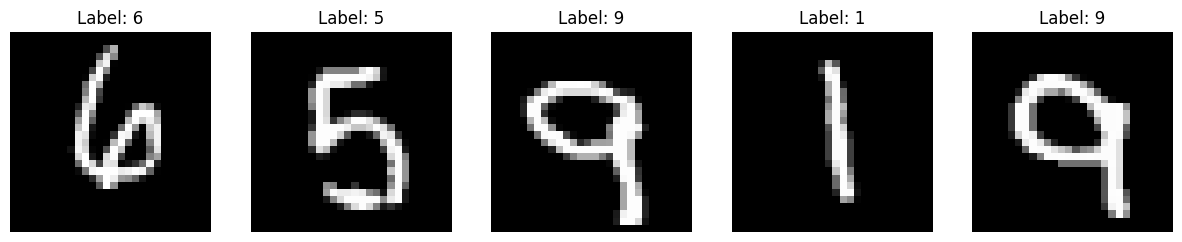

In [4]:
import matplotlib.pyplot as plt
import random

# Set the number of samples
num_samples = 5

# Generate 5 random indices
random_indices = random.sample(range(len(train_data_MNIST)), num_samples)

# Set up the plot for 5 images in a row
plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    image, label = train_data_MNIST[idx]
    plt.subplot(1, num_samples, i+1)
    plt.imshow(image.squeeze(), cmap="gray") # Squeeze the image and display in grayscale
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.show()

In [5]:
class_names = train_data_MNIST.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 7 Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [6]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader_MNIST = DataLoader(train_data_MNIST, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True #shuffle data every epoch?
                              )

test_dataloader_MNIST = DataLoader(test_data_MNIST,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

# Let's check out what we've created
print(f'DataLoader: {train_dataloader_MNIST, test_dataloader_MNIST}')
print(f'Length of train dataloader: {len(train_dataloader_MNIST)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader_MNIST)} batches of {BATCH_SIZE}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7b391a86fa90>, <torch.utils.data.dataloader.DataLoader object at 0x7b391a86fb20>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# 8 Recreate `model_2` used in this notebook (the same model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Create a convolutional neural network
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2_MNIST = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2_MNIST

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 9 Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [10]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2_MNIST.parameters(),
                             lr=0.1)

In [11]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn



In [18]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2_MNIST = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader_MNIST,
        model=model_2_MNIST,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader_MNIST,
        model=model_2_MNIST,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2_MNIST = timer()
total_train_time_model_2_MNIST = print_train_time(start=train_time_start_model_2_MNIST,
                                           end=train_time_end_model_2_MNIST,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.12024 | Train accuracy: 96.30%
Test loss: 0.06344 | Test accuracy: 97.90%

Epoch: 1
---------
Train loss: 0.07668 | Train accuracy: 97.60%
Test loss: 0.06069 | Test accuracy: 98.05%

Epoch: 2
---------
Train loss: 0.06234 | Train accuracy: 98.12%
Test loss: 0.05528 | Test accuracy: 98.16%

Train time on cpu: 162.485 seconds


# 10 Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [20]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [56]:
import random
random.seed(42)
test_samples = []
test_labels = []
num_samples = 10
for sample, label in random.sample(list(test_data_MNIST), k=num_samples):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [57]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2_MNIST,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.8936e-11, 1.3946e-07, 1.0000e+00, 6.9490e-08, 1.1828e-14, 1.8306e-15,
         3.4069e-14, 4.3014e-09, 4.1875e-07, 5.3973e-11],
        [1.2026e-07, 9.8878e-01, 7.5628e-06, 3.2316e-07, 9.9439e-06, 6.3731e-03,
         1.2262e-03, 1.0207e-06, 3.5710e-03, 3.4327e-05]])

In [58]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1, 1])

In [59]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1, 1]))

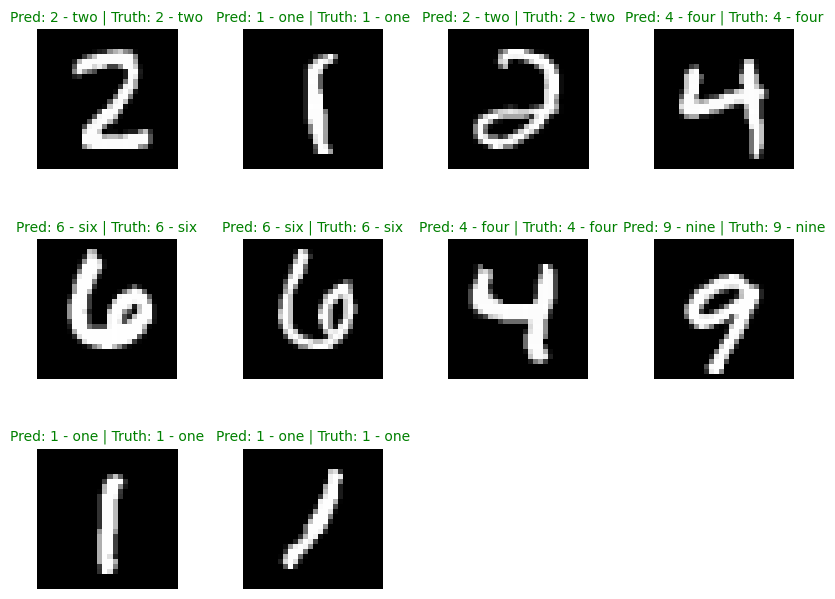

In [60]:
import math

plt.figure(figsize=(num_samples, num_samples))  # Increase figure size for better spacing

# Number of rows and columns
nrows = math.ceil(math.sqrt(num_samples))
ncols = math.ceil(math.sqrt(num_samples))

# Adjust subplot layout
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Add more space between plots

font_size = 10  # Adjust font size as needed

for i, sample in enumerate(test_samples[:num_samples]):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=font_size, color="green")
    else:
        plt.title(title_text, fontsize=font_size, color="red")

    plt.axis(False)

plt.show()
